IAQF Competition
OLS Part
Jiahao Zhu

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import statsmodels.api as sts
import scipy.stats as stats

In [3]:
#import data
df = pd.read_csv('tot_daily_df_interpolate_lag1.csv',index_col=0)
df.head()

T10Y2Y  DGS10  AAA10Y  VIXCLS  GoldReturn  DCOILWTICOReturn  \
DATE                                                                  
1/2/90    0.07   7.94    0.91   17.24         NaN               NaN   
1/3/90    0.05   7.99    0.91   18.19   -0.013410          0.039842   
1/4/90    0.06   7.98    0.89   19.22   -0.003412         -0.016942   
1/5/90    0.09   7.99    0.88   20.11    0.015701         -0.014630   
1/8/90    0.12   8.02    0.90   20.26    0.006336         -0.063990   

        NASDAQ100Return  RU2000PRReturn  RU3000TRReturn  UNRATE  BUSINVReturn  \
DATE                                                                            
1/2/90              NaN             NaN             NaN     NaN           NaN   
1/3/90        -0.007139        0.004913        0.325863     NaN           NaN   
1/4/90        -0.006122       -0.003588        0.313952     NaN           NaN   
1/5/90        -0.007056       -0.002676        0.308497     NaN           NaN   
1/8/90         0.001791       -0.000237        0.314709     NaN           NaN   

        CPIAUCSLReturn  
DATE                    
1/2/90             NaN  
1/3/90             NaN  
1/4/90             NaN  
1/5/90             NaN  
1/8/90             NaN

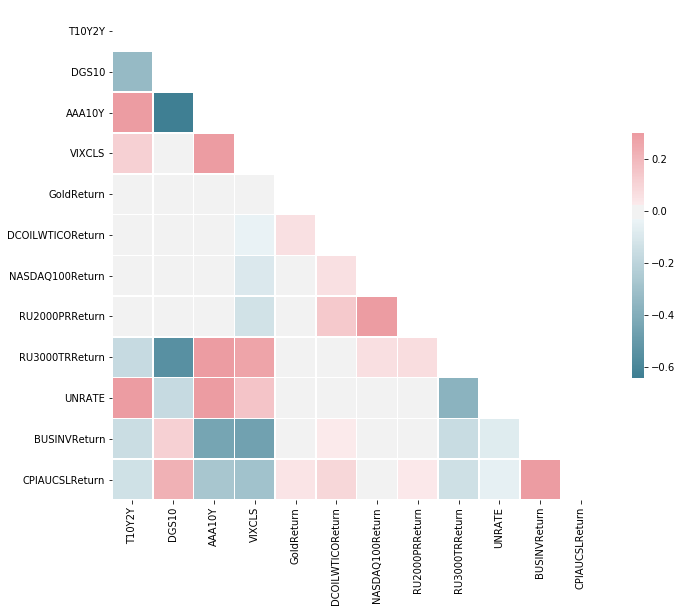

In [4]:
# explore correlation
corr = df.corr()

mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f,ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Concluding that AAA-10Y has correlation with: 
    10Y - 2Y (positive)
    10Y (negative)
    VIX (Positive)
    RU3000Return (Positive)
    UNRATE(positive)
    BUSINV(Negative)
    CPI(Negative)
    
Problem remains: 1.Interpolate method 2.Causality

In [5]:
#Try regression
model1 = sm.ols(formula = "AAA10Y ~ T10Y2Y + DGS10 + VIXCLS + RU3000TRReturn + UNRATE + BUSINVReturn + CPIAUCSLReturn", 
                 data=df, missing='drop').fit()

In [6]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 AAA10Y   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     2946.
Date:                Tue, 12 Feb 2019   Prob (F-statistic):               0.00
Time:                        13:18:27   Log-Likelihood:                 600.37
No. Observations:                6370   AIC:                            -1185.
Df Residuals:                    6362   BIC:                            -1131.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.3184      0.034      9.310      0.000       0.251       0.385
T10Y2Y             0.1914      0.005     37.397      0.000       0.181       0.201
DGS10             -0.0645      0.002    -27.618      0.000      -0.069      -0.060
VIXCLS             0.0167      0.000     35.807      0.000       0.016       0.018
RU3000TRReturn     1.1029      0.031     35.077      0.000       1.041       1.165
UNRATE             0.0359      0.003     11.543      0.000       0.030       0.042
BUSINVReturn     -16.1068      0.698    -23.070      0.000     -17.475     -14.738
CPIAUCSLReturn     5.8008      1.339      4.334      0.000       3.177       8.425
==============================================================================
Omnibus:                       26.881   Durbin-Watson:                   0.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.674
Skew:                           0.038   Prob(JB):                     3.24e-05
Kurtosis:                       2.731   Cond. No.                     1.07e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
# Leave out unemployment rate, RU3000
model2 = sm.ols(formula = "AAA10Y ~ T10Y2Y + DGS10 + VIXCLS  + BUSINVReturn + CPIAUCSLReturn", 
                 data=df, missing='drop').fit()

In [8]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 AAA10Y   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     3232.
Date:                Tue, 12 Feb 2019   Prob (F-statistic):               0.00
Time:                        13:18:33   Log-Likelihood:                 24.003
No. Observations:                6370   AIC:                            -36.01
Df Residuals:                    6364   BIC:                             4.550
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.3172      0.014     91.291      0.000       1.289       1.345
T10Y2Y             0.1607      0.004     44.162      0.000       0.154       0.168
DGS10             -0.1186      0.002    -61.647      0.000      -0.122      -0.115
VIXCLS             0.0244      0.000     55.435      0.000       0.024       0.025
BUSINVReturn     -15.8759      0.759    -20.914      0.000     -17.364     -14.388
CPIAUCSLReturn    12.2275      1.448      8.447      0.000       9.390      15.065
==============================================================================
Omnibus:                      167.153   Durbin-Watson:                   0.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.385
Skew:                           0.377   Prob(JB):                     5.55e-41
Kurtosis:                       3.360   Cond. No.                     1.02e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
#Selected mdel
model3 = sm.ols(formula = "AAA10Y ~ T10Y2Y  + DGS10 +VIXCLS", 
                 data=df, missing='drop').fit()

In [10]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 AAA10Y   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     5917.
Date:                Tue, 12 Feb 2019   Prob (F-statistic):               0.00
Time:                        13:18:38   Log-Likelihood:                -102.35
No. Observations:                6861   AIC:                             212.7
Df Residuals:                    6857   BIC:                             240.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2916      0.012    104.834      0.000       1.267       1.316
T10Y2Y         0.1616      0.004     44.761      0.000       0.155       0.169
DGS10         -0.1295      0.002    -78.516      0.000      -0.133      -0.126
VIXCLS         0.0266      0.000     69.019      0.000       0.026       0.027
==============================================================================
Omnibus:                      382.905   Durbin-Watson:                   0.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              511.817
Skew:                           0.525   Prob(JB):                    7.25e-112
Kurtosis:                       3.829   Cond. No.                         89.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
#validation

X = df[['T10Y2Y','DGS10','VIXCLS']]
X = sts.add_constant(X)
model3.predict(X)

/Users/Jiahao/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


DATE
1/2/90      0.733681
1/3/90      0.749252
1/4/90      0.779568
1/5/90      0.806800
1/8/90      0.811755
1/9/90      0.861756
1/10/90     0.868462
1/11/90     0.805194
1/12/90     0.926014
1/15/90          NaN
1/16/90     0.889517
1/17/90     0.890280
1/18/90     0.873391
1/19/90     0.830587
1/22/90     0.945887
1/23/90     0.892885
1/24/90     0.911335
1/25/90     0.912542
1/26/90     0.925622
1/29/90     0.926968
1/30/90     0.948841
1/31/90     0.899216
2/1/90      0.885858
2/2/90      0.859251
2/5/90      0.866068
2/6/90      0.863265
2/7/90      0.851016
2/8/90      0.844296
2/9/90      0.855776
2/12/90     0.865714
              ...   
12/25/18         NaN
12/26/18    1.769235
12/27/18    1.764057
12/28/18    1.725812
12/31/18    1.653621
1/1/19           NaN
1/2/19      1.590891
1/3/19      1.664785
1/4/19      1.542256
1/7/19      1.538905
1/8/19      1.507045
1/9/19      1.497561
1/10/19     1.484790
1/11/19     1.450587
1/14/19     1.477233
1/15/19     1.465049
1/16/19 

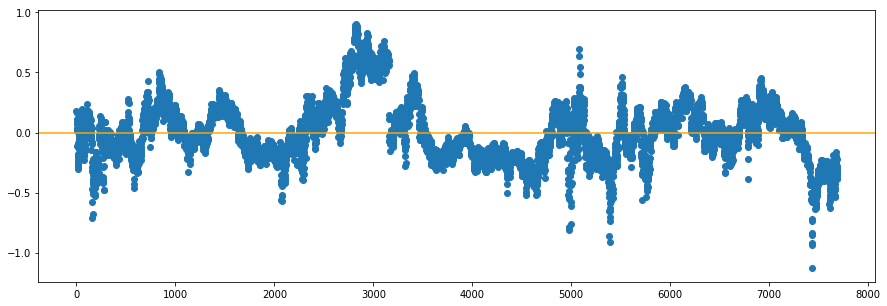

In [21]:
error = list(df['AAA10Y']-model3.predict(X))
plt.figure(figsize=(15,5))
plt.scatter(np.arange(len(error)),error)
plt.axhline(y=0,color="orange")
plt.show()


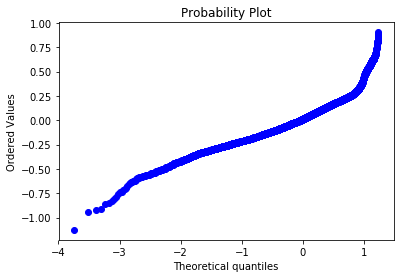

In [28]:
stats.probplot(error, dist="norm", plot=plt)
plt.plot()
plt.show()